In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('crop_recommendation.csv')

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
df['label'].unique()
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
!pip install sqlalchemy pandas


Defaulting to user installation because normal site-packages is not writeable


In [31]:
def plot_crop_stats(dataframe, crop_name, features=None):
    """
    Plots the Min, Max, and Average values for specific features of a chosen crop.
    """
    # Default features if none are provided
    if features is None:
        features = ['K', 'N', 'P', 'temperature', 'ph', 'humidity']
    
    # 1. Filter for the specific crop
    crop_df = dataframe[dataframe['label'] == crop_name]
    
    if crop_df.empty:
        print(f"No data found for crop: {crop_name}")
        return

    # 2. Calculate statistics and transpose for plotting
    stats = crop_df[features].agg(['min', 'max', 'mean']).T
    
    # 3. Create the plot
    ax = stats.plot(kind='bar', figsize=(12, 6), width=0.8, color=['#e74c3c', '#2ecc71', '#3498db'])
    
    # 4. Customization
    plt.title(f'Statistical Analysis for {crop_name.capitalize()}', fontsize=15, pad=20)
    plt.xlabel('Agricultural Parameters', fontsize=12)
    plt.ylabel('Value Range', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(['Minimum', 'Maximum', 'Average'], loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Optional: Add data labels on top of the bars
    plt.tight_layout()
    plt.show()

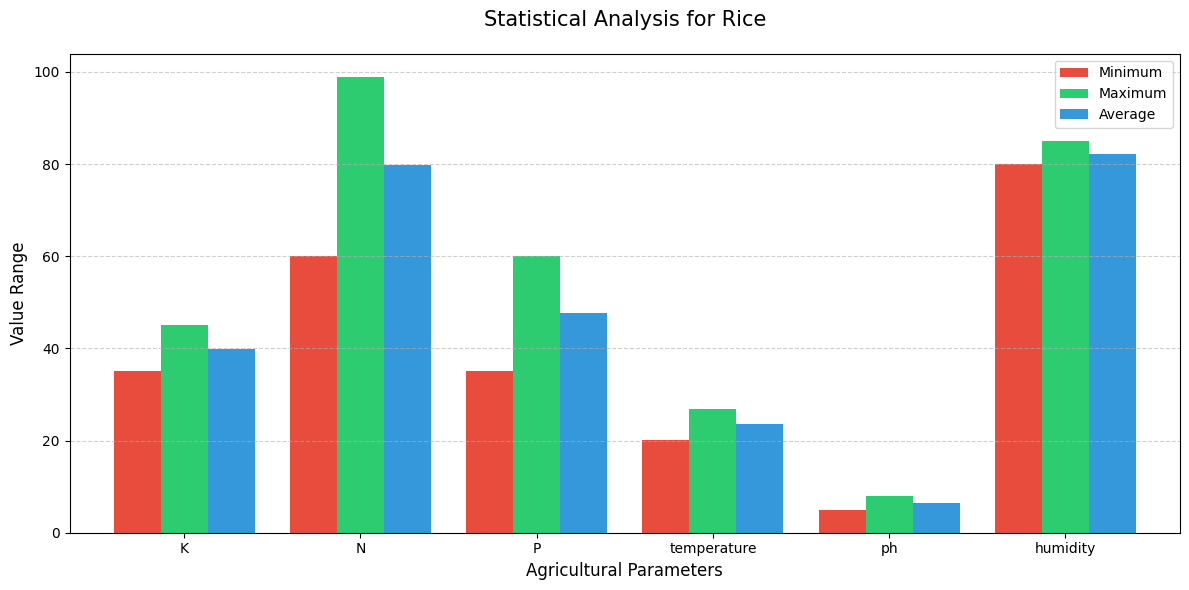

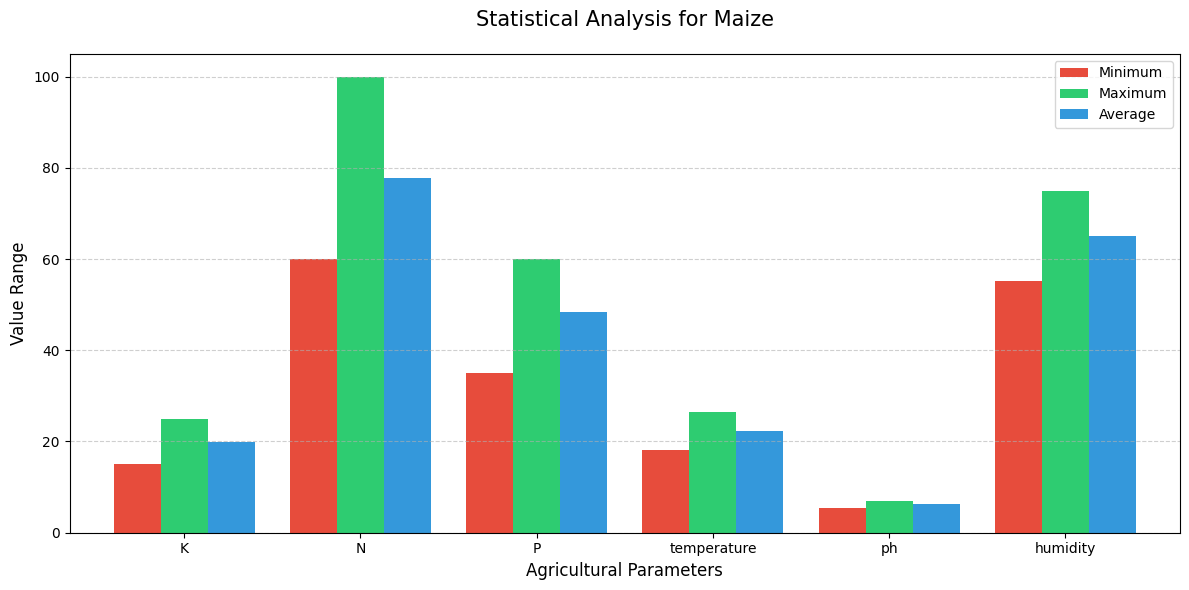

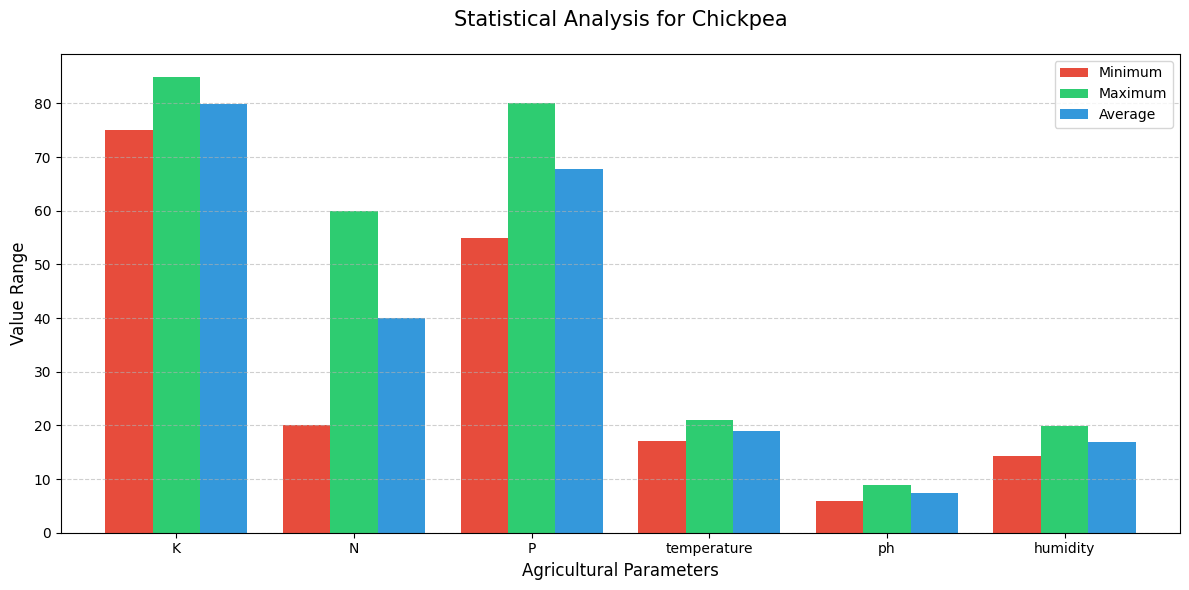

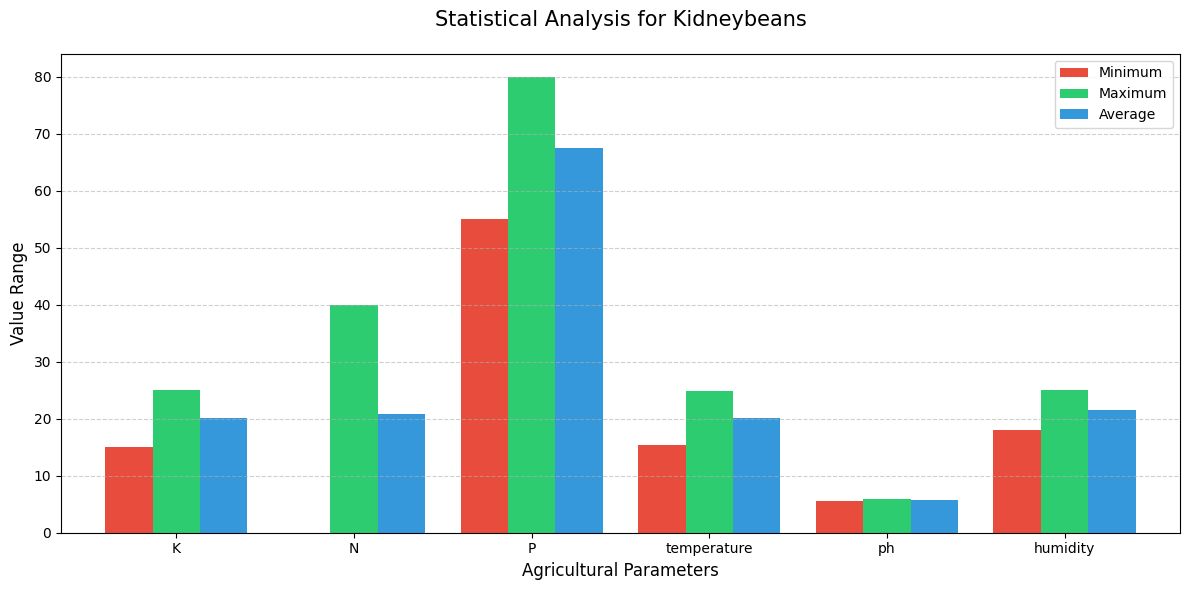

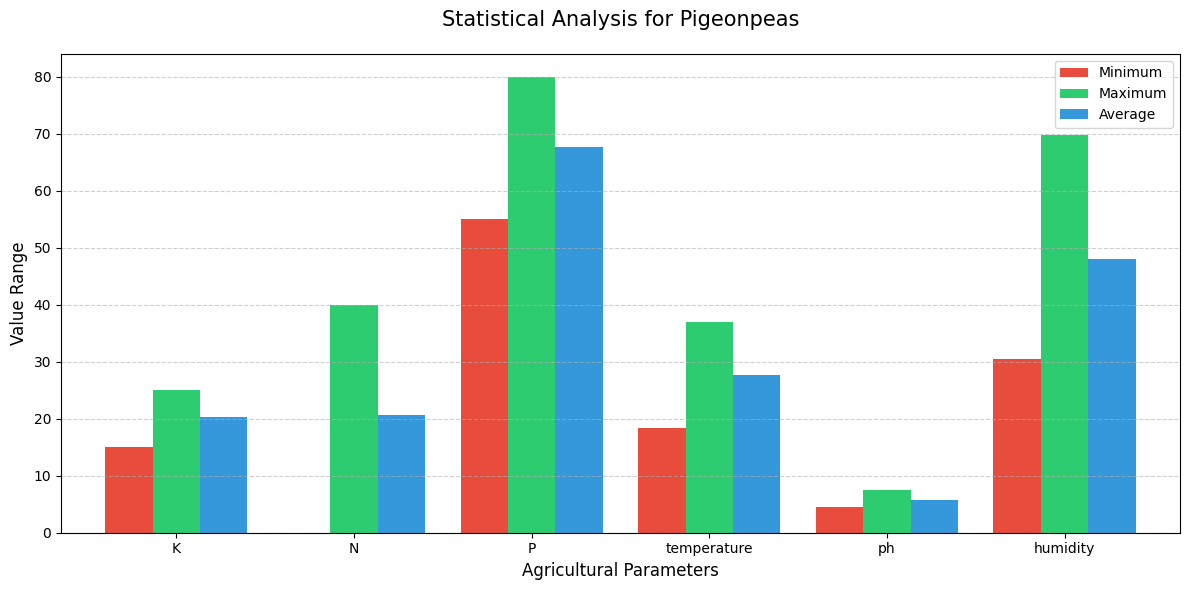

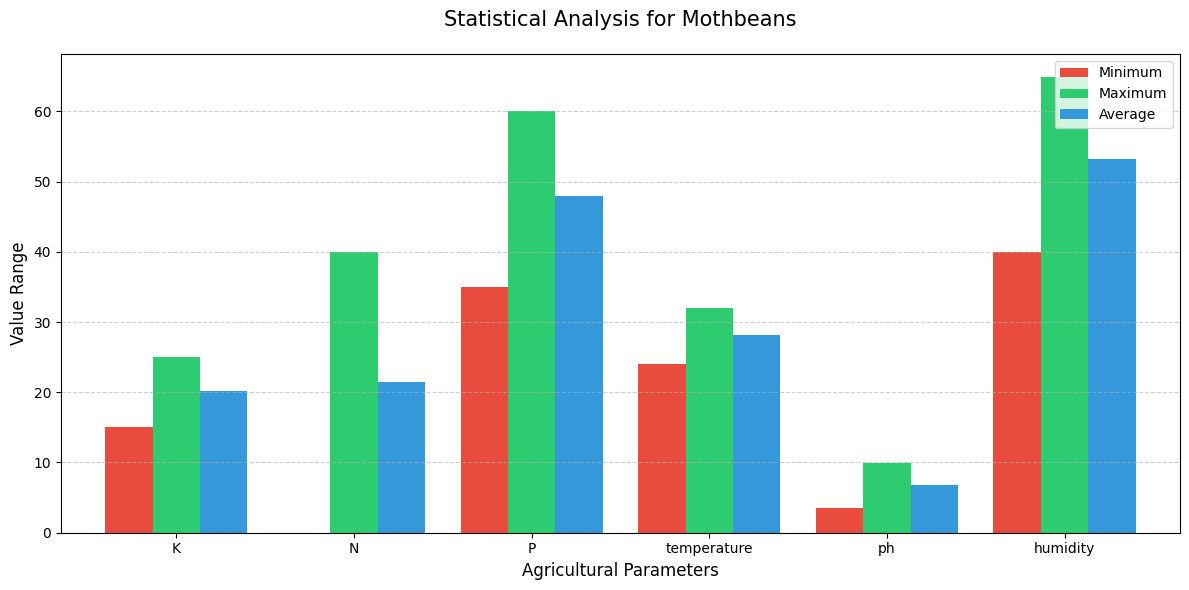

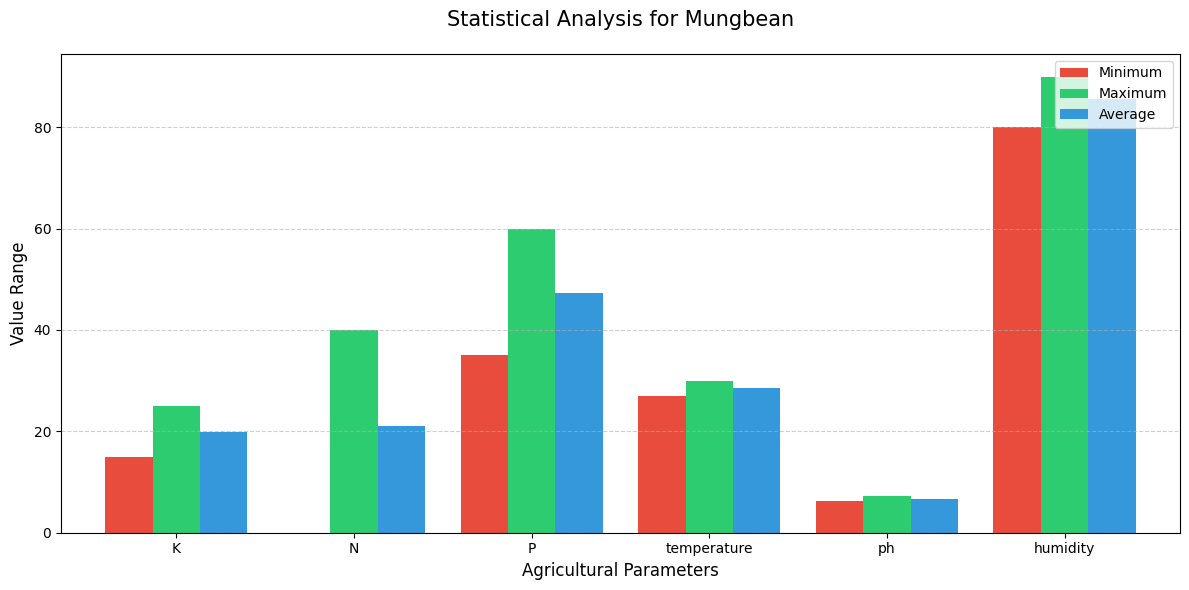

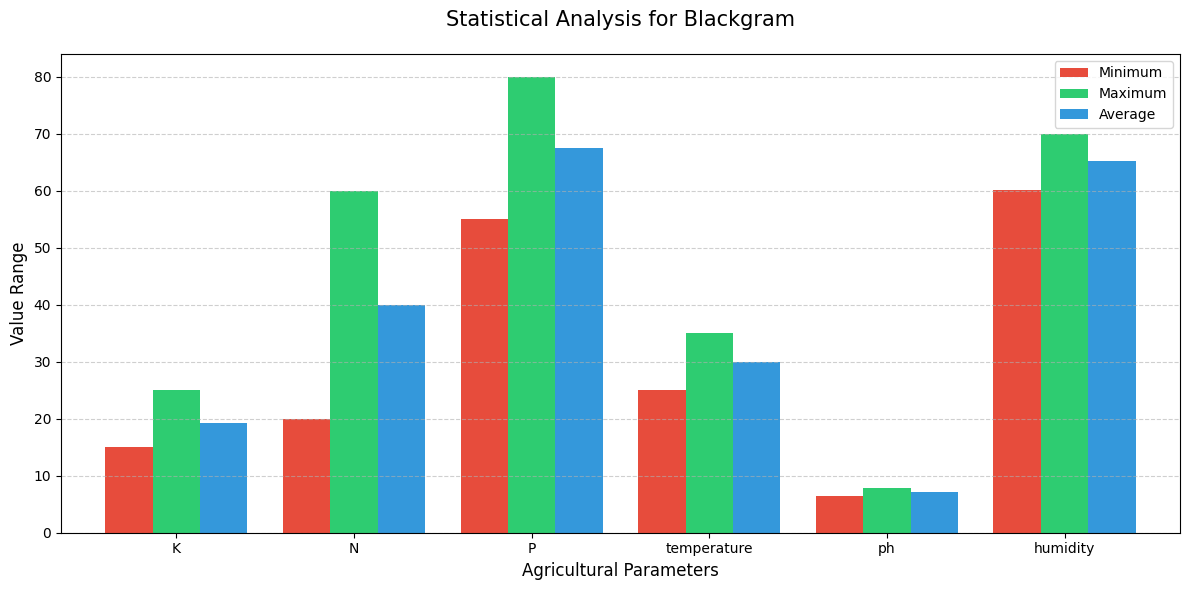

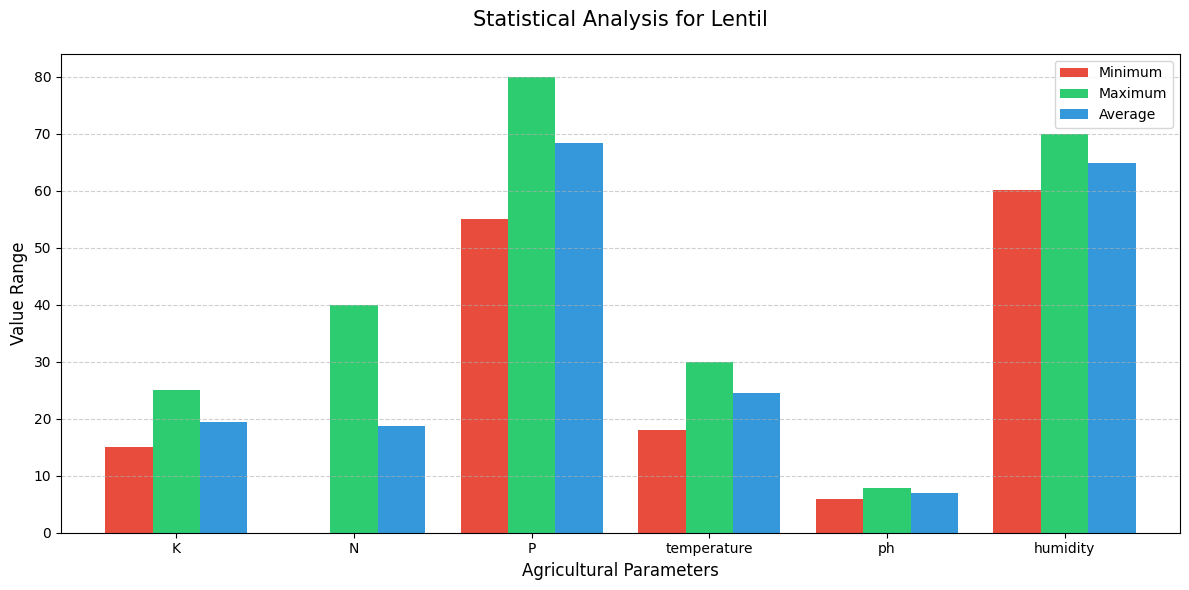

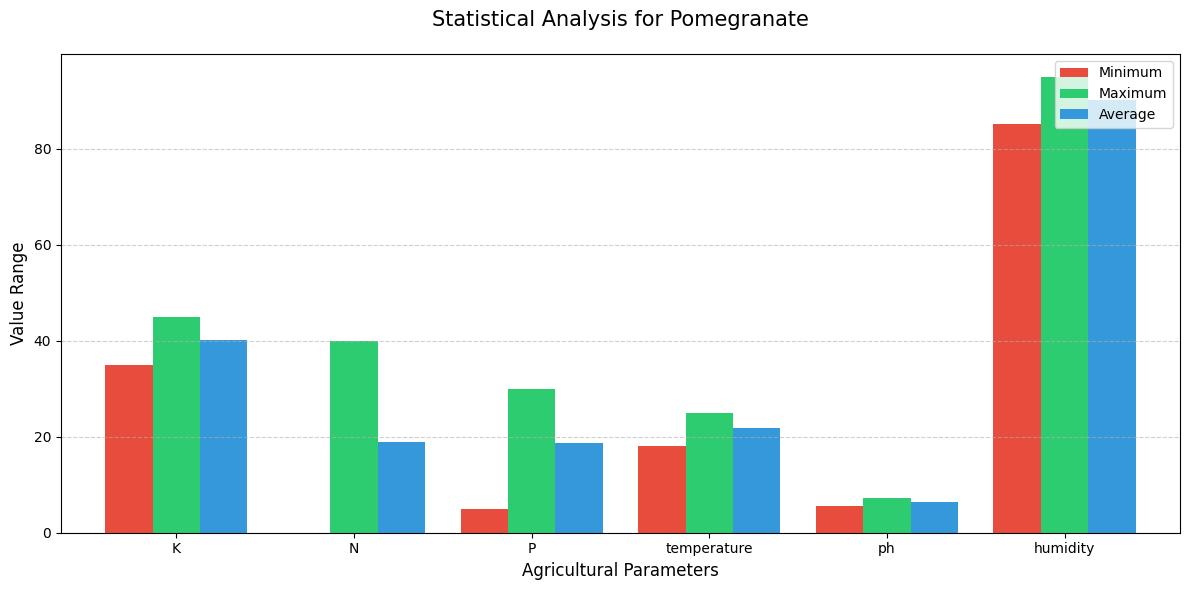

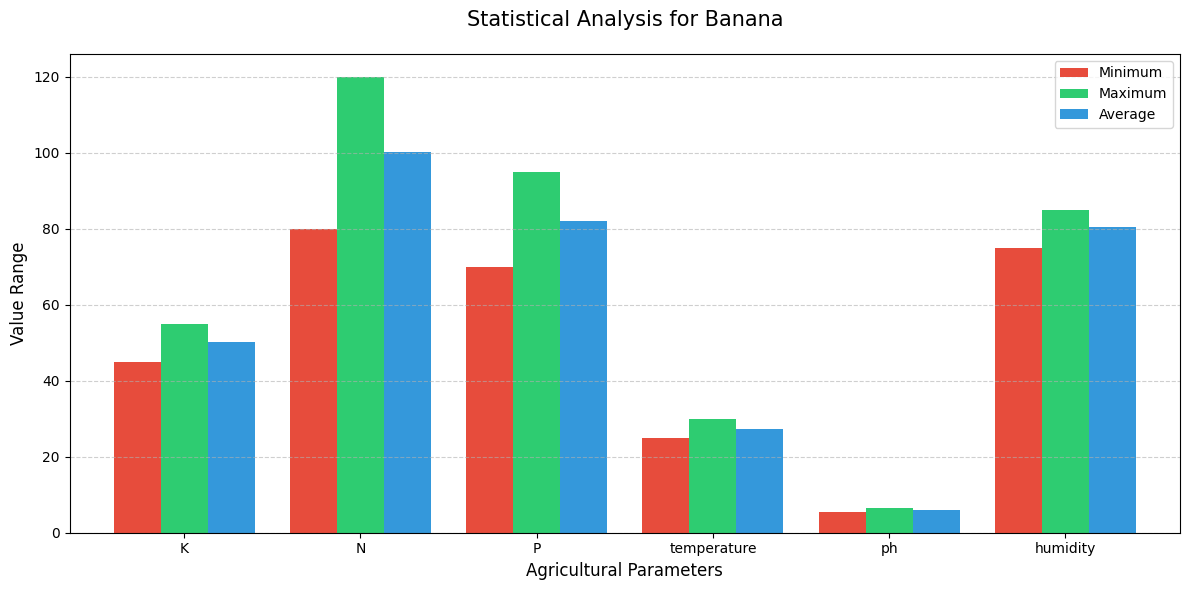

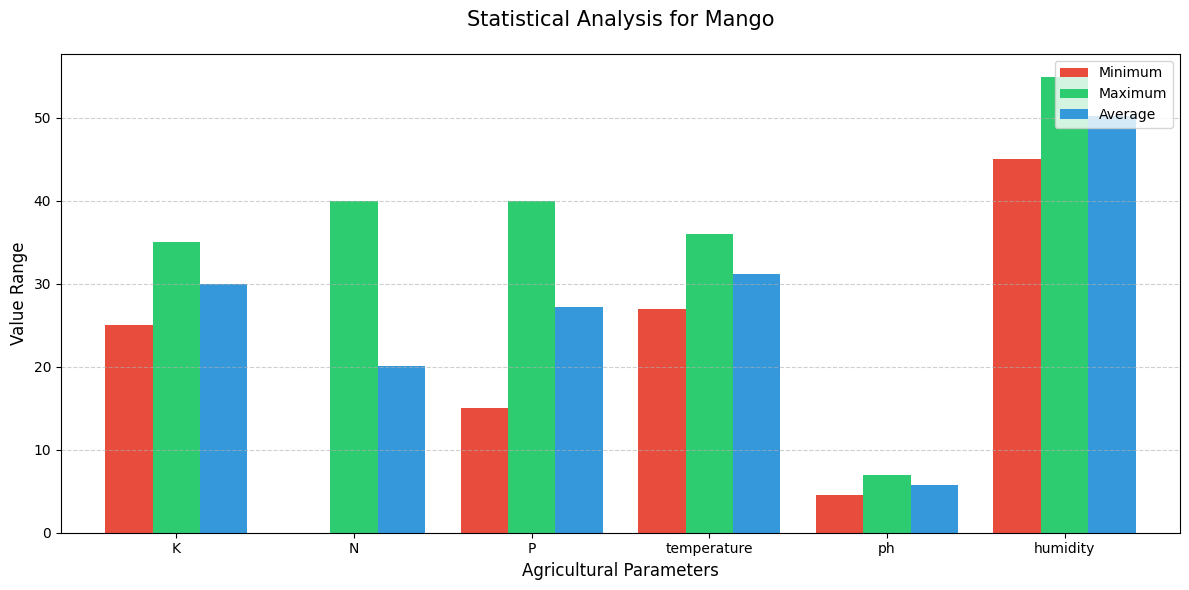

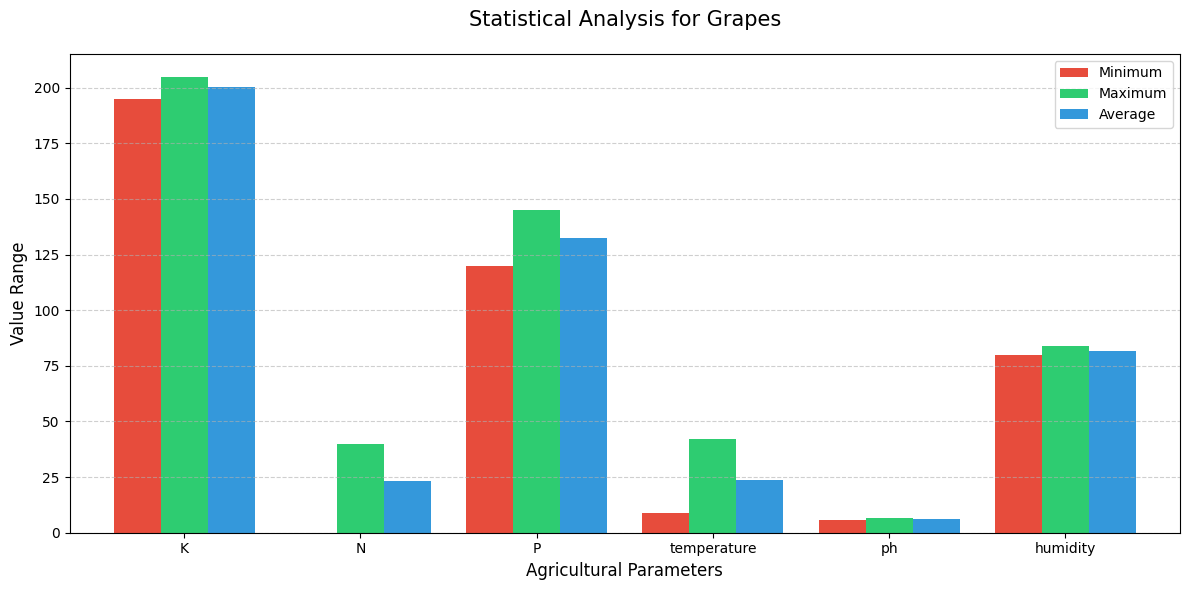

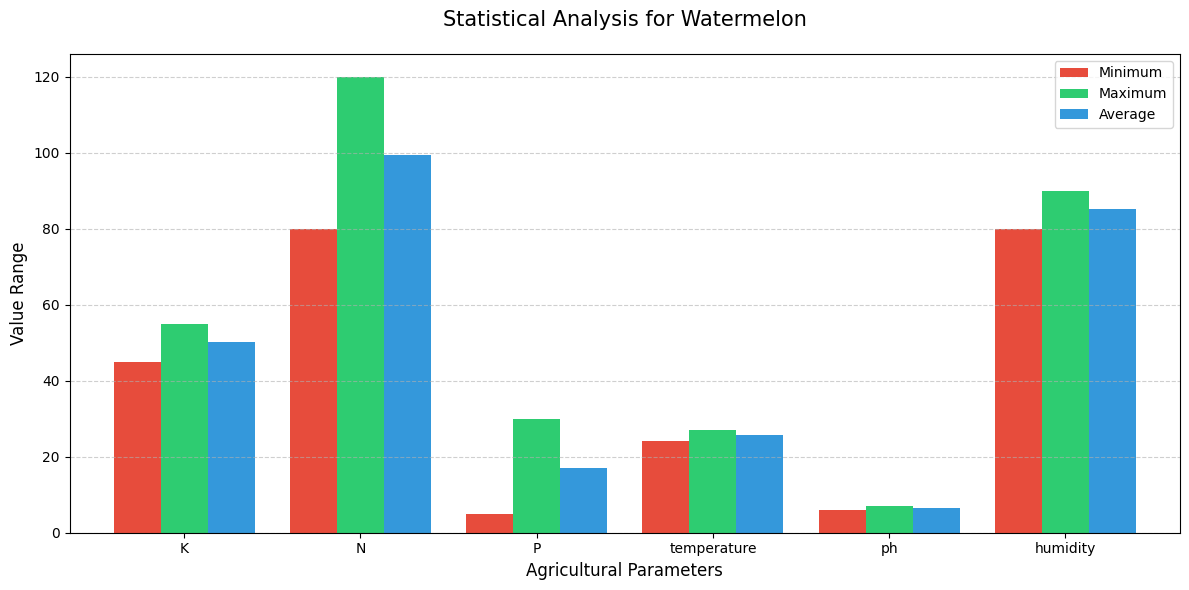

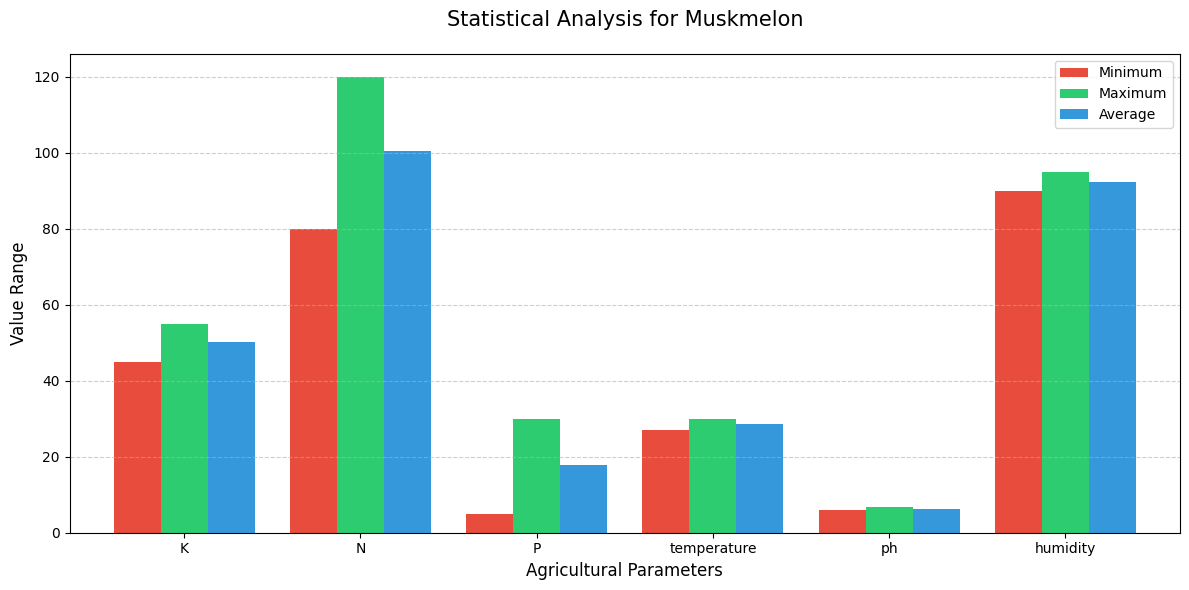

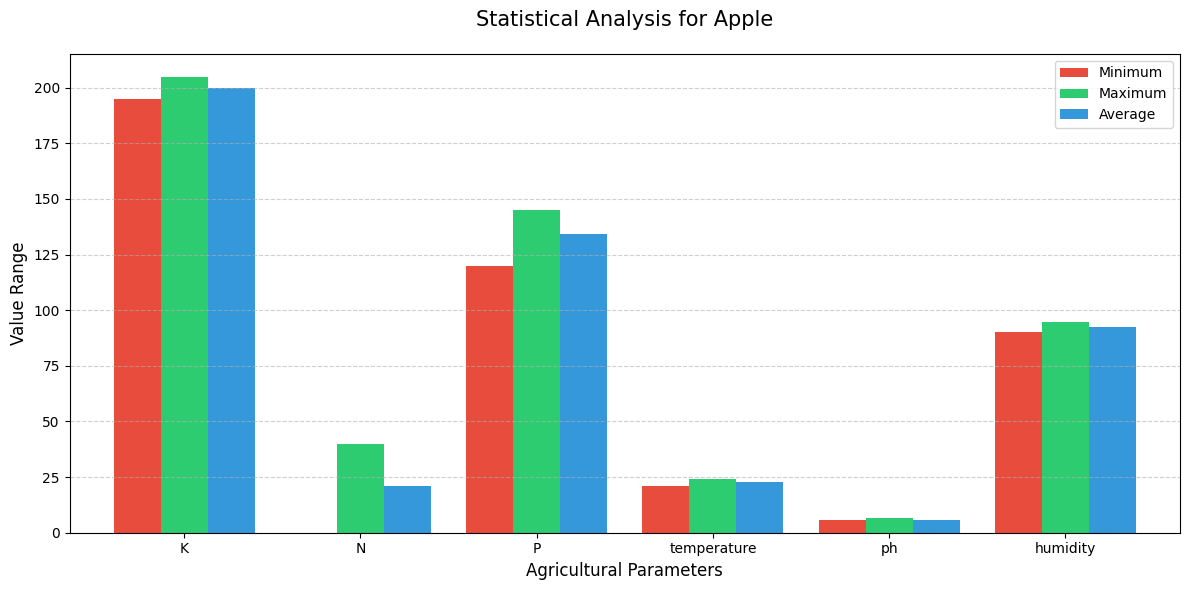

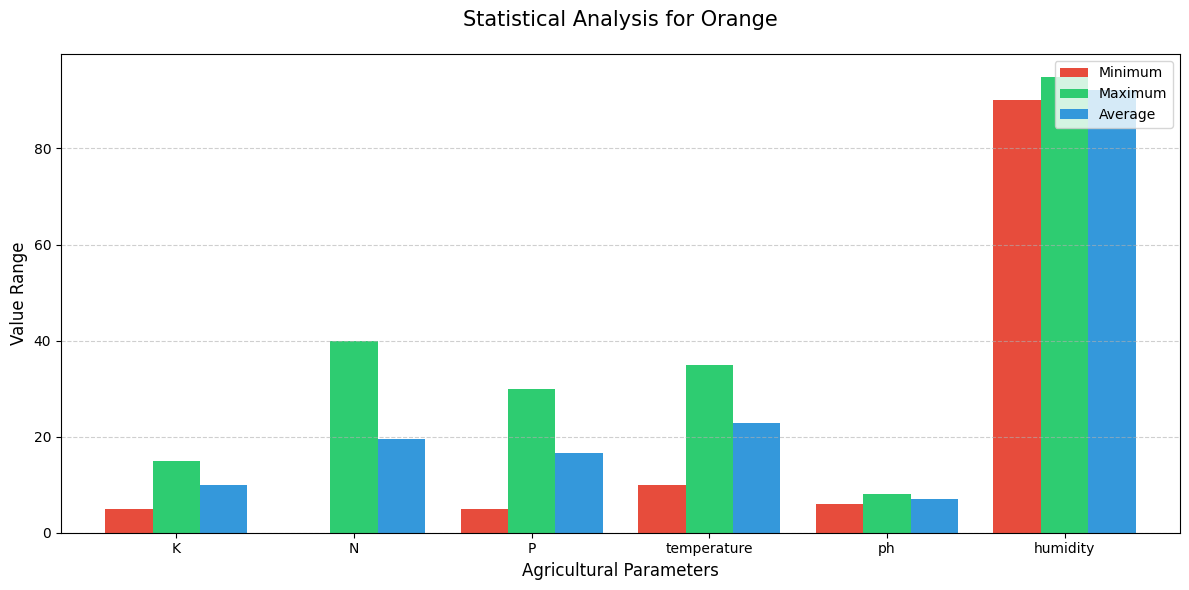

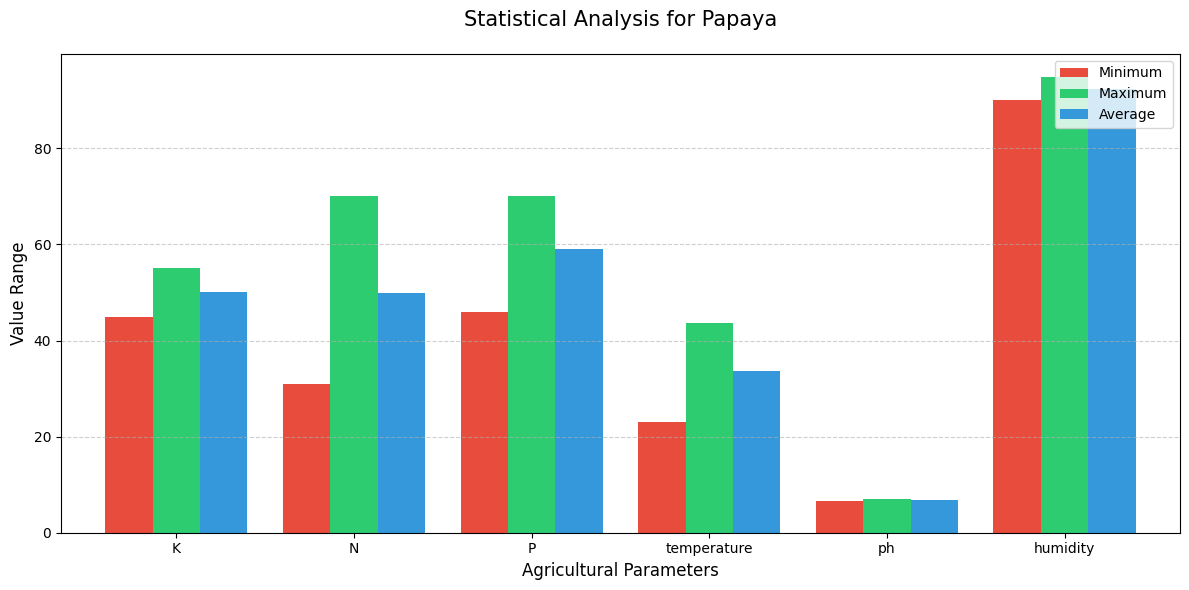

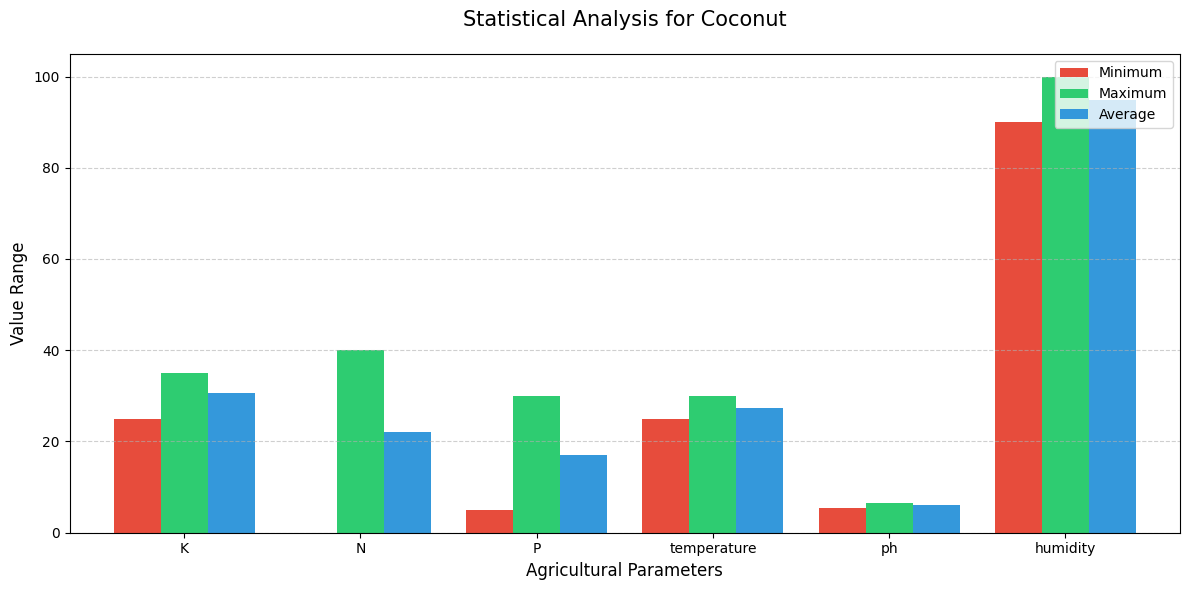

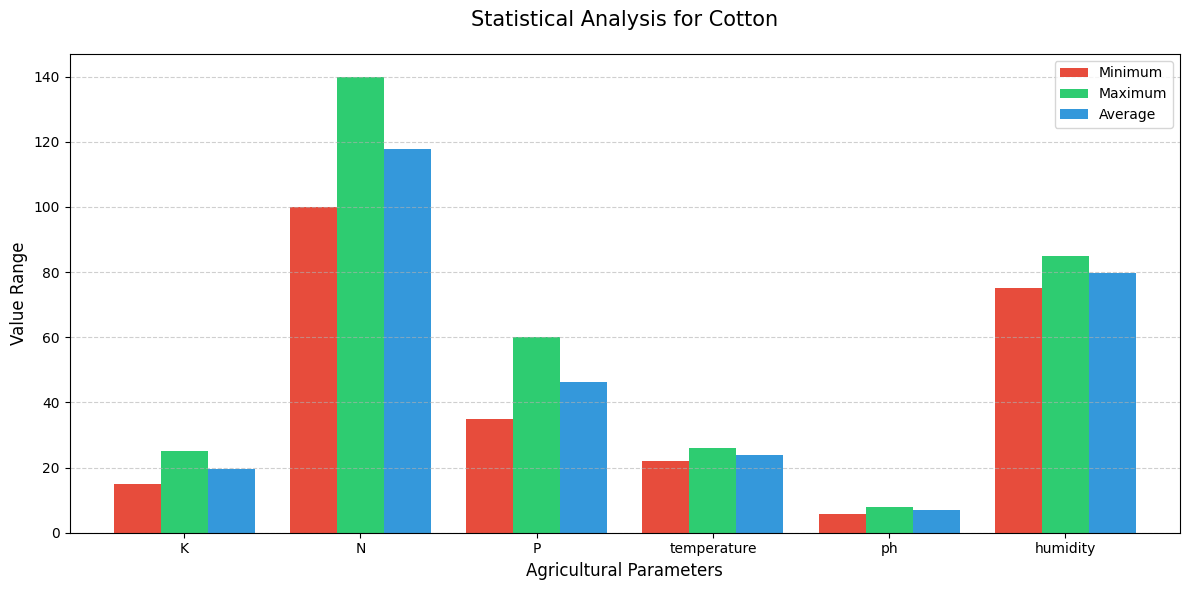

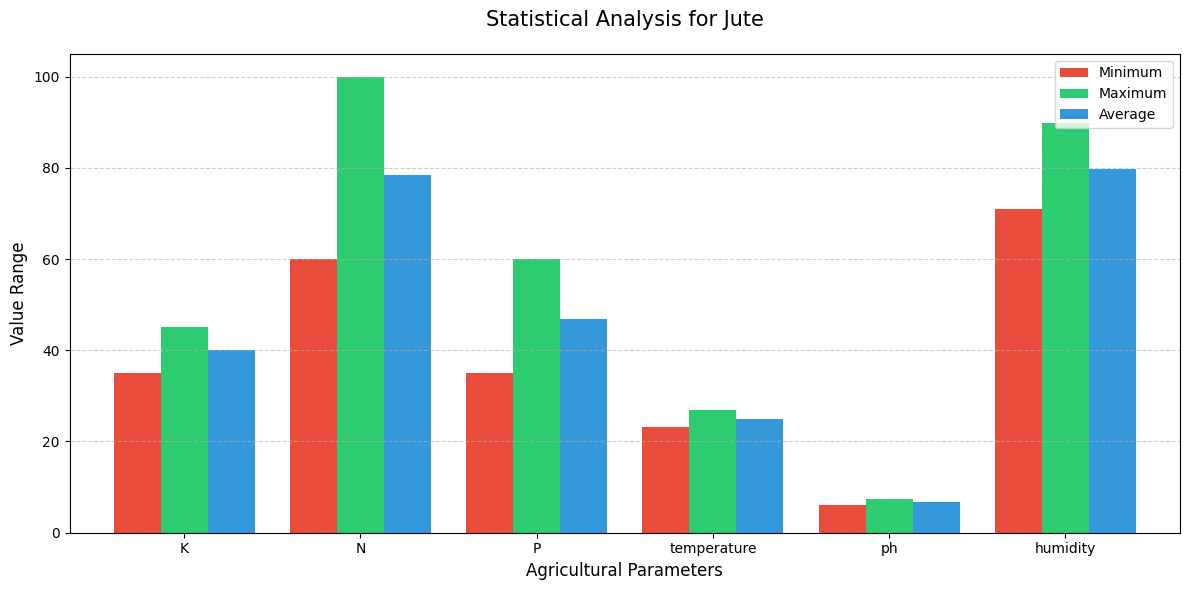

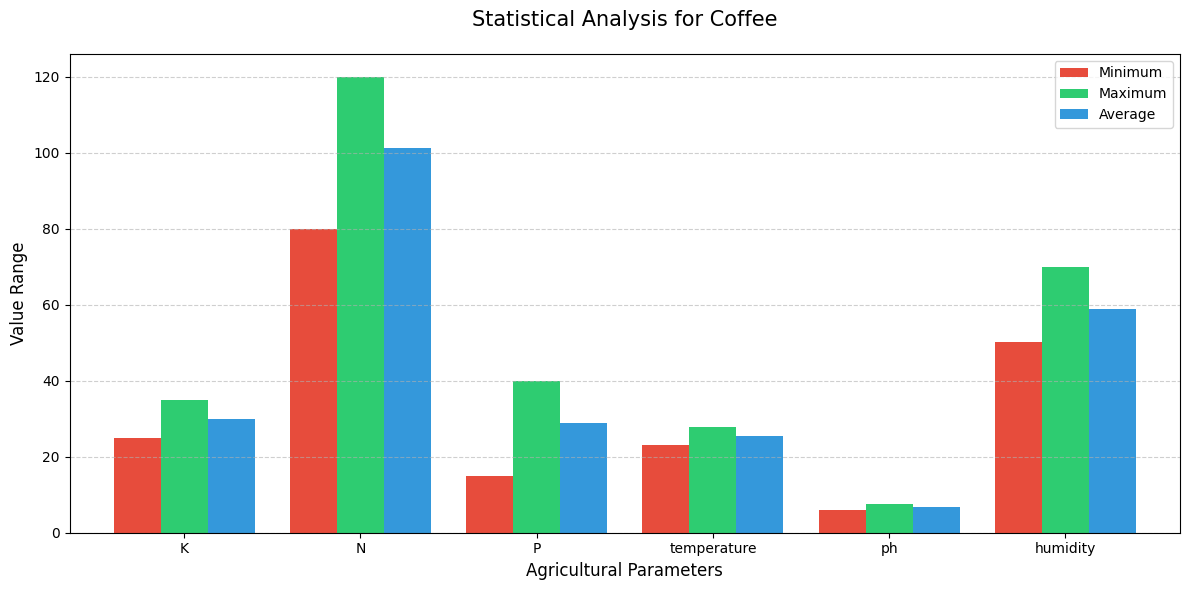

Index out of range. Please provide a valid index.


In [33]:
for x in range(len(df["label"].unique())):
    plot_crop_stats(df, df["label"].unique()[x])
else:
    print("Index out of range. Please provide a valid index.")

In [46]:
def plot_n_distribution(df, features_name):
    # 1. Calculate the mean Nitrogen (N) for each label
    # We sort the values so the chart looks organized (ascending order)
    n_means = df.groupby('label')[features_name].mean().sort_values()

    # 2. Create the horizontal bar chart
    # y: the crop labels, width: the average N values
    plt.figure(figsize=(10, 8))
    plt.barh(y=n_means.index, width=n_means.values, color='lightgreen')

    # 3. Add formatting
    plt.xlabel('Average ' + features_name.capitalize(), fontsize=12)
    plt.ylabel('Crop Label', fontsize=12)
    plt.title('Average ' + features_name.capitalize(), fontsize=14)
    
    # Add a grid on the x-axis to make it easier to read values
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # 4. Display or save
    plt.tight_layout()
    plt.show()

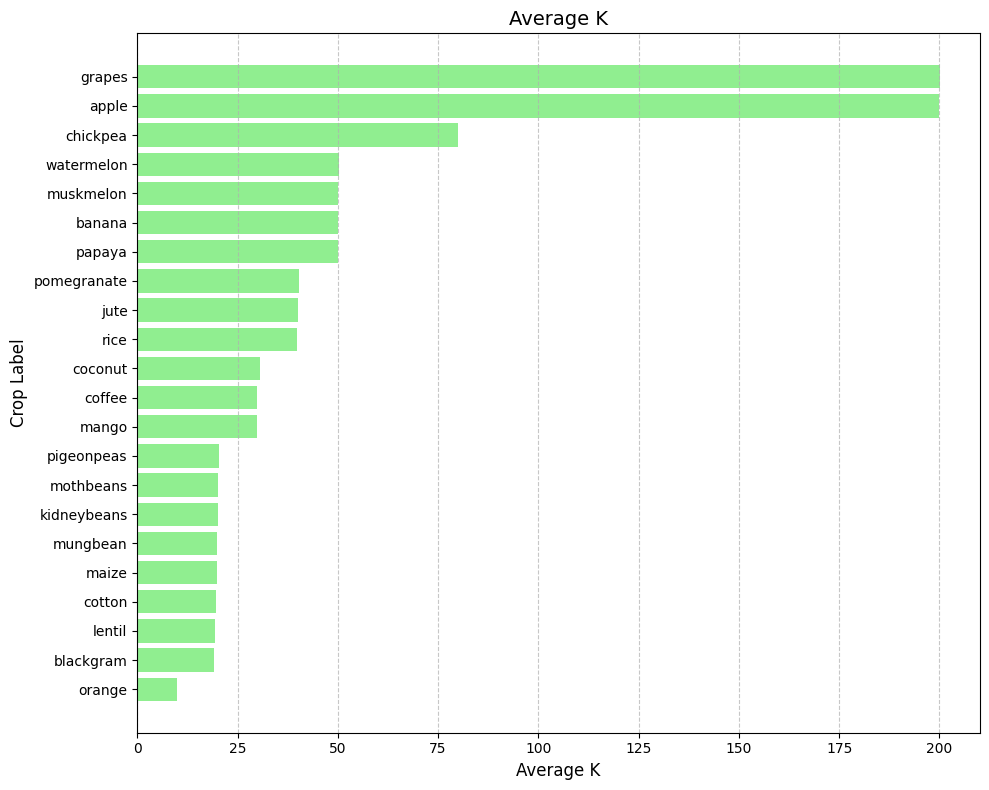

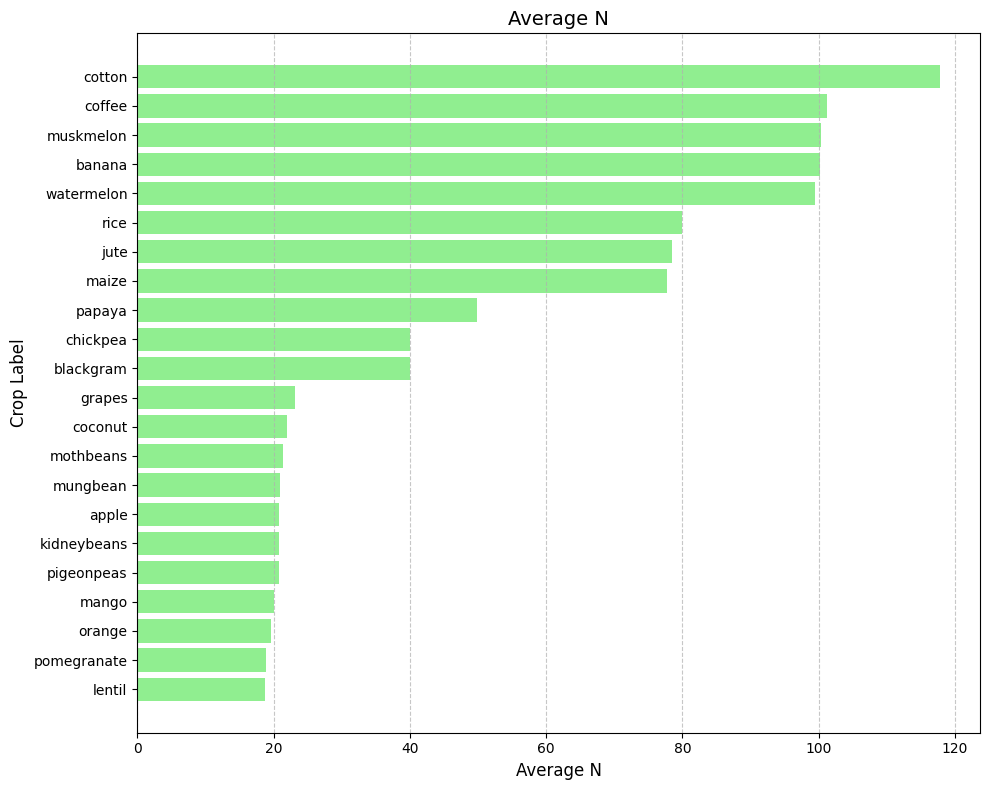

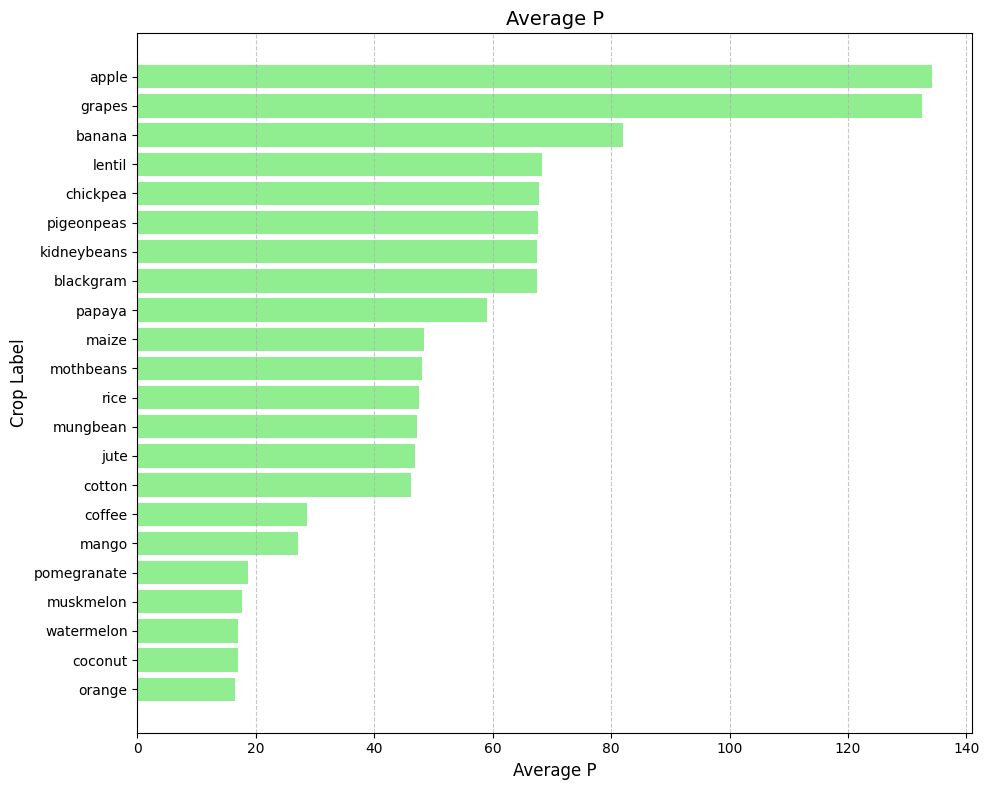

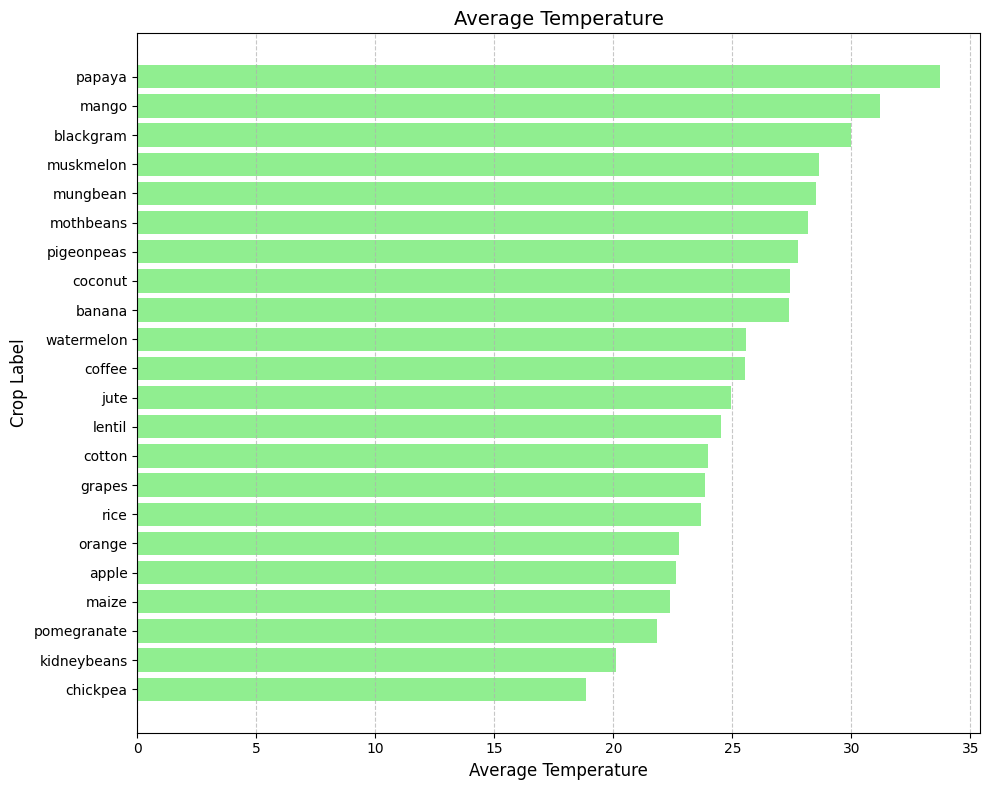

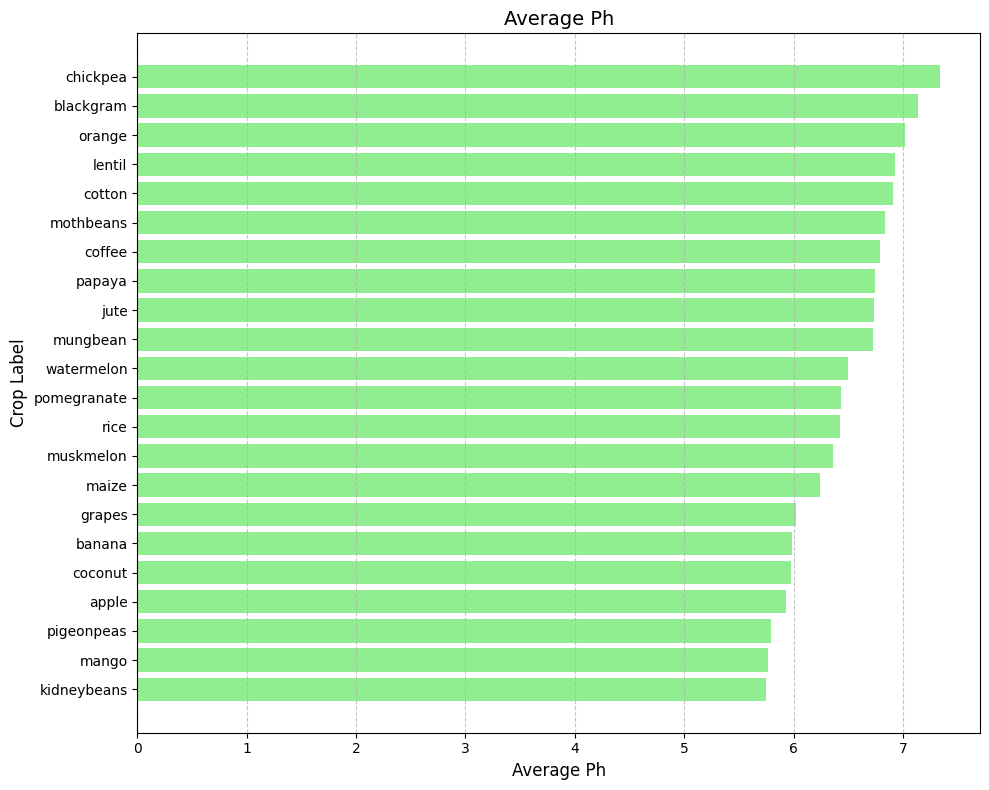

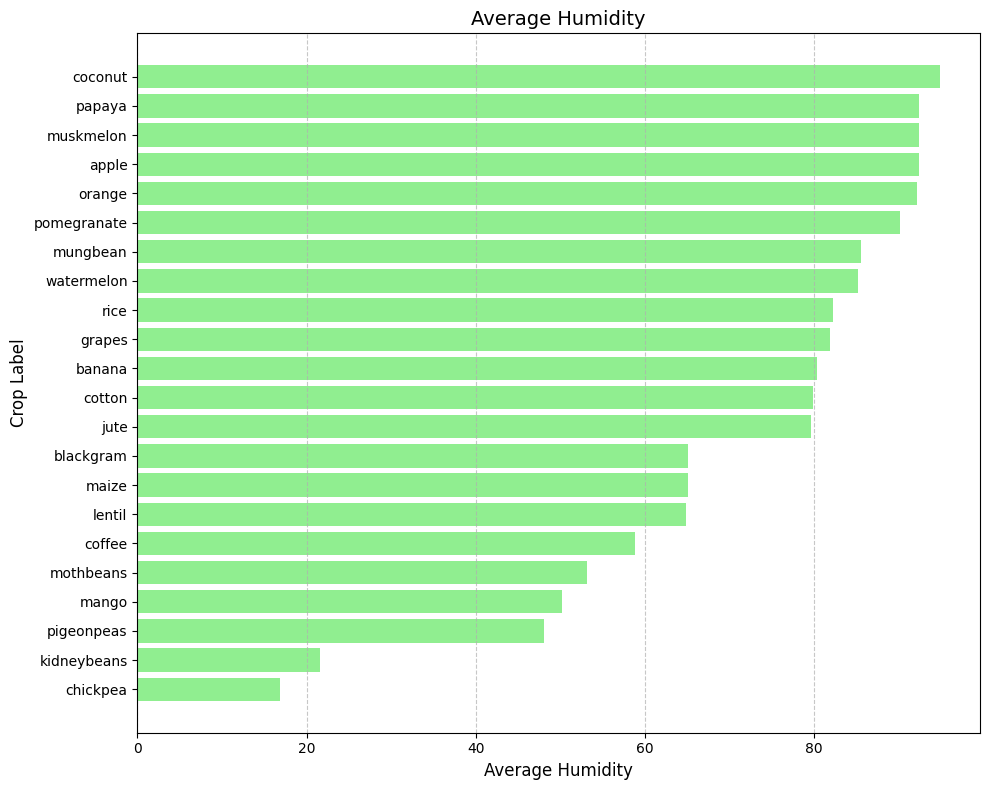

Index out of range. Please provide a valid index.


In [50]:
features = ['K', 'N', 'P', 'temperature', 'ph', 'humidity']
for x in range(len(features)):
    plot_n_distribution(df, features[x])
else:
    print("Index out of range. Please provide a valid index.")

In [ ]:
features = ['K', 'N', 'P', 'temperature', 'ph', 'humidity']
for  x in range(len(features)):
    for y in range(len(df['label'].unique())):
        sns.heatmap([df[y]][x].unique().corr(), annot=True, cmap='coolwarm')features = ['K', 'N', 'P', 'temperature', 'ph', 'humidity']

for label_value in df['label'].unique():
    sub = df[df['label'] == label_value][features]
    corr_mat = sub.corr()
    sns.heatmap(corr_mat, annot=True, cmap='coolwarm')


KeyError: 0

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [54]:
np.random.seed(42)

X = x.reshape(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph']])

Y = df['label']= 'cotton'

AttributeError: 'int' object has no attribute 'reshape'

In [53]:
model = LinearRegression()
model.fit(X, Y)

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array('cotton', dtype='<U6')` instead.